# Tabular_playground_september_2021

### Data Description

#### For this competition, you will predict whether a customer made a claim upon an insurance policy. The ground truth claim is binary valued, but a prediction may be any number from 0.0 to 1.0, representing the probability of a claim. The features in this dataset have been anonymized and may contain missing values.

## Libraries

In [4]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, KFold, RepeatedKFold, ShuffleSplit, cross_validate, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Algoritmi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pipeline
from imblearn.pipeline import Pipeline

## Data Exploration

In [5]:
# Importo il dataset

data = pd.read_csv('Tabular_playground_data.csv')
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.300,8.6331,4.0607,26.8670,-1.180,10961.00,1.5397,135.3200,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.0,-0.000276,1.090600e+16,1705.400,414.29,3.5392,1888.0,0.968930,18.3880,-0.001583,7.7059,5.9325,0.025693,4.5604,0.61122,10.7950,0.341930,0.235010,NaN,5237.70,1.29610,163.66,0.403780,0.188600,-0.001446,-0.35416,6.6432,0.30534,0.514020,1.907300e+09,29.861,0.965010,1797.2,72.178,108.6200,1.9799,1.2907,0.99519,1.3228,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,43956.0,1978.2,5.5084,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.8862,-0.00558,5252.100,166.690,1.60740,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.6404,31.877,123620.00,1.3951,125.8100,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.0,-0.001344,3.079400e+16,229.100,844.82,1.4680,4726.5,0.915380,-1.5321,0.982600,7.1112,2.0797,0.042321,4.2523,0.41871,5.4499,0.012737,0.386470,7.3082,283.21,-0.92552,140.80,0.247390,-0.001656,-0.000975,-0.22629,2.4246,0.77147,0.011613,1.803700e+09,64.604,0.262650,4455.0,78.339,745.5100,2.9069,1.4826,1.00510,1.4974,84.446,3.505600e+15,2.242300e+09,0.896300,4.6749,17713.0,9003.1,-4.3546,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.3880,0.46843,754.610,83.233,1.18900,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.873,7.5463,1.9967,1.9526,817.760,-2948.70,2.0054,1.6826,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.0,-0.002207,5.849100e+13,-897.840,NaN,1.3561,3063.4,0.086232,16.1060,0.001481,11.4760,5.3430,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.337700,-1.0732,4097.00,13.45800,159.24,0.322300,0.560090,0.000455,-0.16083,3.5753,0.60970,0.028301,5.271300e+08,14.454,0.115490,14605.0,36.992,-9.6391,64.2670,NaN,0.99278,2.5891,430.400,-4.453500e+13,5.144900e+12,0.099591,6.5516,1887.5,43319.0,4.3931,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,NaN,0.49459,43.524,138.520,1.10790,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840,7.8490,1.0379,8.0030,12.349,-195.28,2.5598,92.1420,0.63789,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.98941,301200.0,NaN,-0.000007,-9.299200e+13,-10.818,1020.30,2.9553,3342.5,-0.000372,17.0110,0.095268,5.7448,15.8830,0.037934,4.4860,-0.88909,8.4384,-1.189800,0.001391,NaN,175.81,67.

In [7]:
data.shape

(957919, 120)

In [8]:
data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,942696.000000,942494.000000,9.423260e+05,942455.000000,942697.000000,942410.000000,942475.000000,942492.000000,942594.000000,942445.000000,942464.000000,942465.000000,942641.000000,942563.000000,942289.000000,942413.000000,9.425610e+05,9.424750e+05,9.426540e+05,942504.000000,942527.000000,942241.000000,9.423900e+05,9.424270e+05,942671.000000,9.425850e+05,942556.000000,942607.000000,942485.000000,942360.000000,942551.000000,942523.000000,942503.000000,942464.000000,942456.000000,942436.000000,942286.000000,942396.000000,942473.000000,942539.000000,942357.000000,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000,942488.000000,9.424010e+05,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000,942437.000000,942700.000000,9.423820e+05,9.423490e+05,942463.000000,942350.000000,942668.000000,942470.000000,942541.000000,942599.000000,942573.000000,9.424340e+05,942292.000000,9.425340e+05,942470.000000,9.423960e+05,942603.000000,942371.000000,942474.000000,942437.000000,942412.000000,942427.000000,942462.000000,942505.000000,942320.000000,942634.000000,942654.000000,9.426310e+05,942485.000000,942393.000000,942570.000000,9.427510e+05,942319.000000,942721.000000,942533.000000,942375.000000,942535.000000,9.425790e+05,942390.000000,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,5323.442367,0.729518,1.844436e+09,0.247759,6.999152,0.019394,444.804439,6.892520,4.491982,22.448660,203.782031,61070.567499,2.269597,87.166891,0.341240,414.983986,3.379988e+12,1.254164e+12,2.256887e+06,0.329054,7.882455,0.394211,1.344700e+05,3.579055e+05,-0.000005,2.782318e+16,185.485192,406.072571,1.768743,1981.074344,0.359381,446.664352,0.359571,6.946628,29.761954,0.013454,4.277615,0.029221,6.378937,-0.425397,0.299912,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762,0.273404,2.469247e+09,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355,1.544838,482.147786,7.964640e+14,1.063963e+12,0.376600,6.876209,10721.517913,10525.861146,1.555219,0.194237,3.240370,1.053811e+11,152.850973,6.128694e+06,635.301741,3.251414e+10,26.598567,207.260994,3805.100719,6.733556,0.366754,4868.608259,132.264261,0.821190,13.120677,3849.687894,0.999970,1.415684e+13,1.683151,0.425840,20.213776,3.215760e+05,548.647493,3855.616303,0.178027,0.160832,0.014196,1.671873e+09,0.398622,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492
std,276527.540591,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,10068.380032,1.495535,2.125478e+09,0.101156,6.621472,0.101880,631.327086,1.715735,3.899241,14.609968,281.015052,89859.616863,0.896001,37.350264,1.643595,314.822410,5.655524e+12,1.642736e+12,2.303909e+06,0.433861,5.939864,0.781932,2.036605e+05,4.626670e+05,0.001534,3.452707e+16,701.769083,314.708639,0.588984,1958.688237,0.441752,620.581881,0.407419,1.831970,28.776654,0.014658,1.139983,0.676841,2.107511,0.729078,0.146104,88.181507,2525.289159,21.651584,16.041827,0

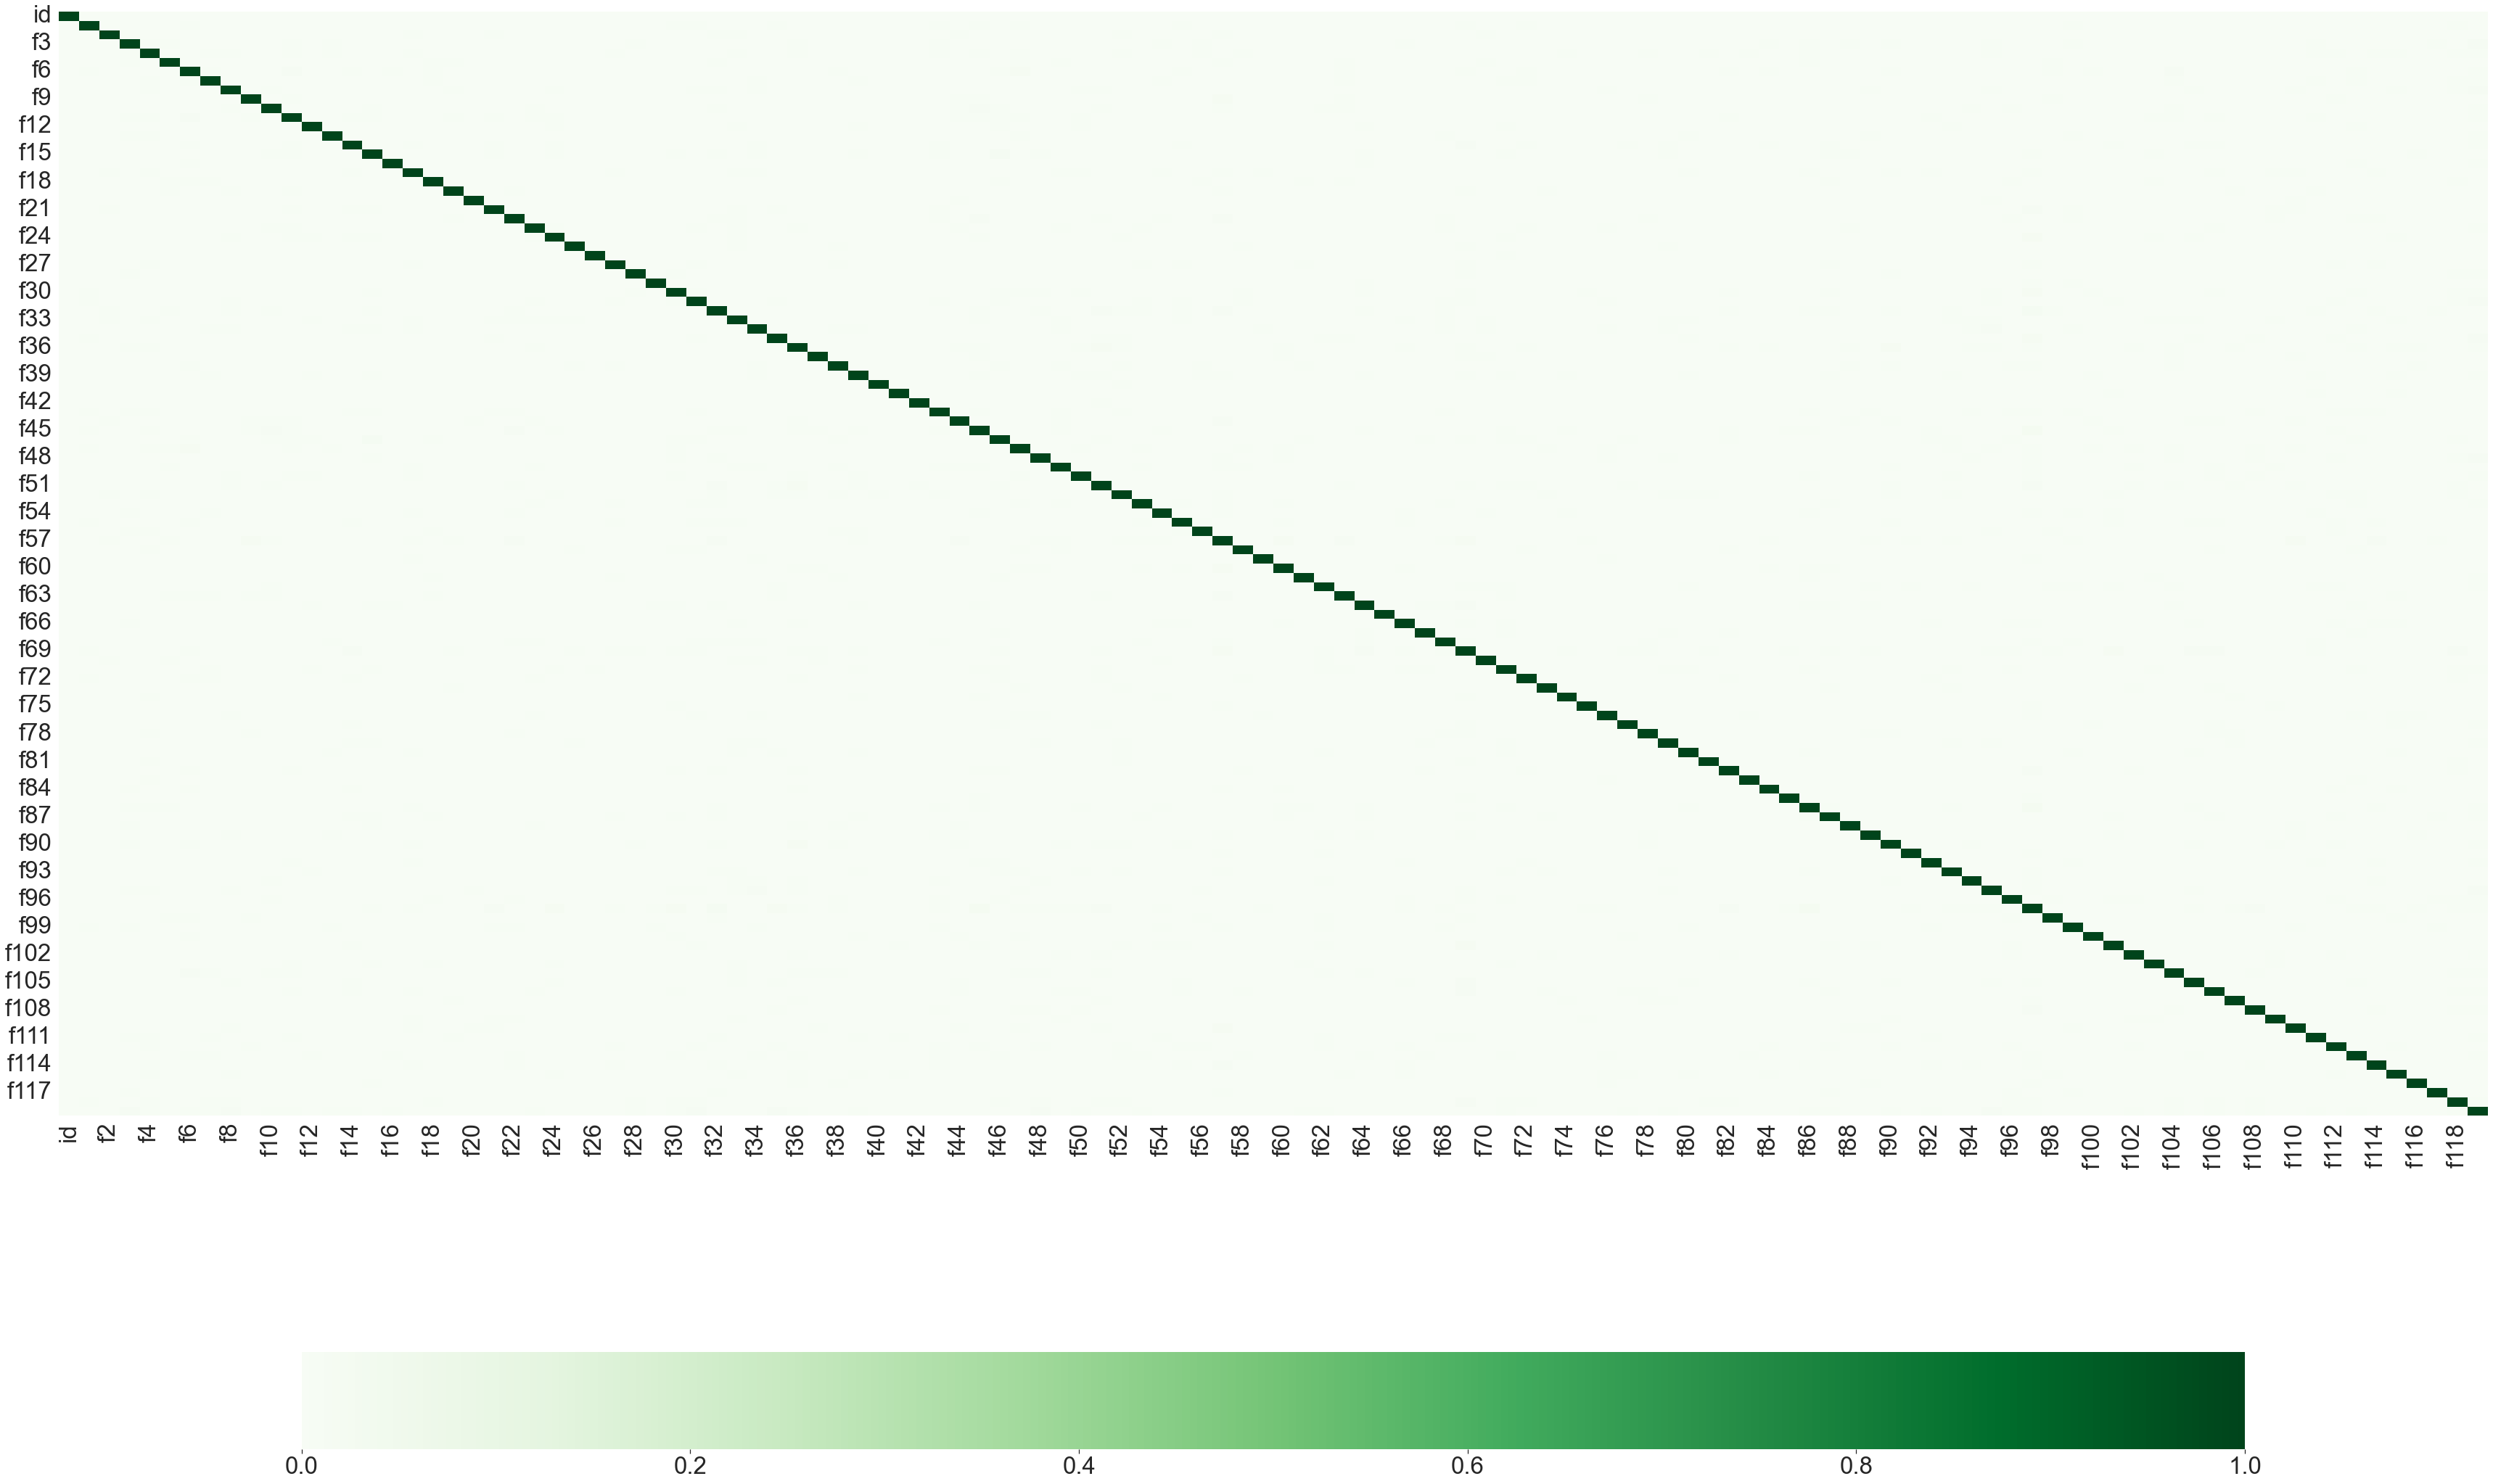

In [9]:
# Matrice di Correlazione

corrMatrix = data.corr()
plt.figure(figsize = (60, 40))
sn.set(font_scale = 3)
sn.heatmap(corrMatrix, 
           vmin = 0, 
           vmax = 1, 
           cbar_kws = {'orientation': 'horizontal', 'shrink': .8},
           cmap = 'Greens')
plt.show()

## Feature Engineering

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB


Le colonne presentano tutti valori numerici, non ci sono stringhe. Non è pertanto necessario applicare One Hot Encoding

#### Gestione valori nulli

In [11]:
# Calcolo la percentuale di valori mancanti ordinata in modo decrescente e la trasformo in dataframe

count_missing_value = data.isna().sum() / data.shape[0]*100
count_missing_value_df = pd.DataFrame(count_missing_value.sort_values(ascending=False), columns=['Missing%'])
count_missing_value_df.sort_values

<bound method DataFrame.sort_values of        Missing%
f31    1.636673
f46    1.631975
f24    1.631662
f83    1.631349
f68    1.630514
...         ...
f104   1.586564
f2     1.585729
f102   1.583432
id     0.000000
claim  0.000000

[120 rows x 1 columns]>

Text(0.5, 0, 'Features')

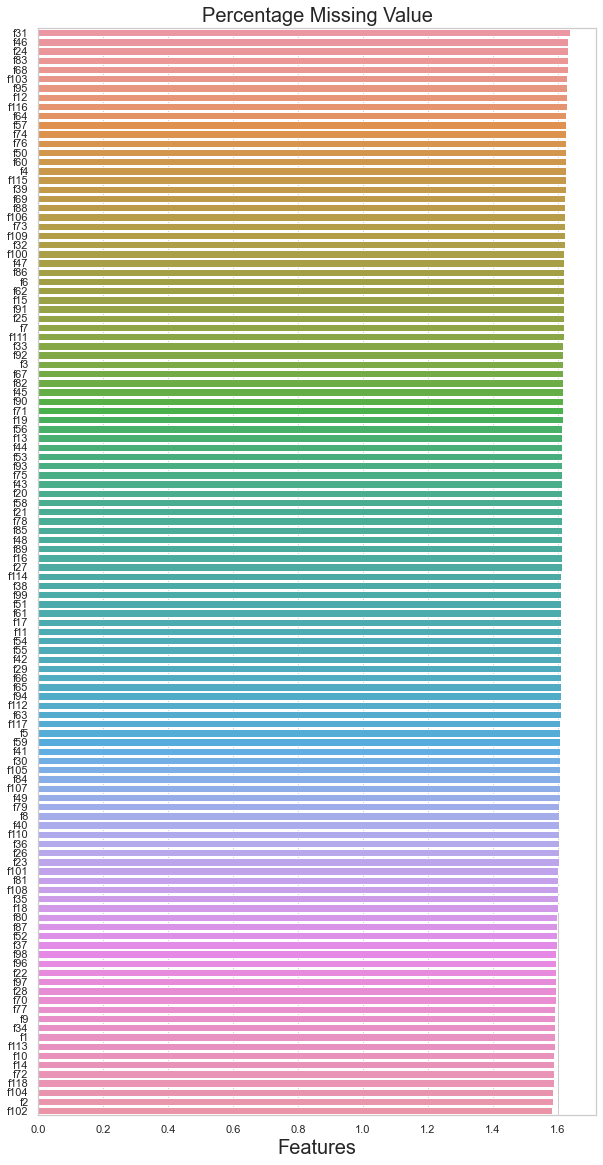

In [12]:
missing_value_df = count_missing_value_df[count_missing_value_df['Missing%'] > 0]

plt.figure(figsize=(10, 20)) # Set the figure size
sn.set_theme(style="whitegrid")
missing_value_graph = sn.barplot(y = missing_value_df.index, x = "Missing%", data=missing_value_df, orient="h")
missing_value_graph.set_title("Percentage Missing Value", fontsize = 20)
missing_value_graph.set_xlabel("Features", fontsize = 20)

Tutte le colonne presentano circa un 1,5% di valori nulli, tranne la colonna degli output che risulta completa.

In [12]:
# Se eliminassimo i valori nulli?

data_drop = data.dropna()
data_drop.shape

(359464, 120)

Ogni colonna presenta una percentuale molto bassa di valori nulli, per cui si potrebbe valutare l'opzione di eliminarli. Tuttavia, questi sono dislocati molto spesso su righe diverse. L'eliminazione massiva dei valori nulli comporterebbe una forte riduzione della numerosità del dataset, portandolo a circa un terzo di quello di partenza.

Altra ipotesi sarebbe quella di sostituirli con 0, ma anche questa opzione ha poco senso, in quanto i valori assunti dalle singole colonne sono di ordini di grandezza diversi, per cui in molti casi genererebbero ulteriori outliers.

Trattandosi di una percentuale molto ristretta per ogni singola colonna, ho deciso di sostituirli con la media e mantenere il dataset con la sua numerosità originaria.

In [13]:
# Gestione NaN: sostituzione per ogni colonna del Nan con la sua media

data_fillna = data.fillna(data.mean())

In [14]:
data_fillna.isna().sum()

id       0
f1       0
f2       0
f3       0
f4       0
        ..
f115     0
f116     0
f117     0
f118     0
claim    0
Length: 120, dtype: int64

#### Gestione outliers

La rappresentazione grafica tramite boxplot degli outliers, sia per l'ampia numerosità delle features, che per la loro differenza in termini di ordine di grandezza dei valori, si è rivelata poco significativa. Per consentirne una visualizzazione efficace, sarebbe stato necessario suddividere i vari boxplot in diversi sottogruppi, il che avrebbe reso il notebook estremamente lungo e molto pesante.
Ho provveduto a ricavare la frequenza di outliers per ogni feature, rappresentandolo di seguito in un unico grafico come % rispetto alla numerosità totale.

In [15]:
# Identificazione degli outliers attraverso il metodo del range interquartile (IQR)

Q1 = data_fillna.quantile(0.25)
Q3 = data_fillna.quantile(0.75)

# Definizione regione IQR
IQR = Q3 - Q1
print(IQR)

id       4.789590e+05
f1       4.500300e-02
f2       1.718900e-01
f3       3.898920e+03
f4       2.572670e-01
             ...     
f115     9.280000e-02
f116     5.149434e+16
f117     4.751900e+03
f118     4.596950e-01
claim    1.000000e+00
Length: 120, dtype: float64


In [16]:
# Identifico i due quartili per ogni colonna contenuta nella X, calcolo il limite massimo e il minimo e sostituisco
# tutti i valori al di fuori dei range con un valore nullo

for x in data_fillna.columns.drop(['id', 'claim']):
    q75,q25 = np.percentile(data_fillna.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_fillna.loc[data_fillna[x] < min,x] = np.nan
    data_fillna.loc[data_fillna[x] > max,x] = np.nan

In [17]:
data_fillna.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,NaN,-37.566,0.017364,0.28915,NaN,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,NaN,8.6331,4.0607,26.86700,-1.180000,10961.00,1.5397,135.320,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.000000,-0.000276,1.090600e+16,NaN,414.290000,NaN,1888.0,0.968930,18.3880,-0.001583,7.7059,5.932500,0.025693,4.5604,0.61122,10.7950,0.341930,0.235010,56.638828,5237.70,1.29610,163.66,0.40378,0.188600,-0.001446,-0.35416,6.6432,0.30534,0.514020,1.907300e+09,29.861,NaN,1797.2,72.178,108.620000,1.9799,1.290700,0.99519,1.3228,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,NaN,1978.2,5.508400,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.886200,NaN,5252.100,166.690,1.6074,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.100000,1.01770,1
1,1,0.10090,0.29961,NaN,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.64040,31.877000,123620.00,1.3951,125.810,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.000000,-0.001344,3.079400e+16,229.100,844.820000,1.4680,4726.5,0.915380,-1.5321,0.982600,7.1112,2.079700,0.042321,4.2523,0.41871,5.4499,0.012737,0.386470,7.308200,283.21,-0.92552,140.80,0.24739,-0.001656,-0.000975,-0.22629,2.4246,0.77147,0.011613,1.803700e+09,64.604,0.262650,4455.0,78.339,745.510000,2.9069,NaN,1.00510,1.4974,84.446,NaN,2.242300e+09,0.896300,4.6749,17713.0,9003.1,-4.354600,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.388000,0.46843,754.610,83.233,1.1890,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,NaN,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.000000,0.28359,0
2,2,0.17803,NaN,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,NaN,0.38164,1.230300e+09,0.25807,2.455600,0.019394,26.873,7.5463,1.9967,1.95260,NaN,-2948.70,2.0054,NaN,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.000000,-0.002207,5.849100e+13,NaN,406.072571,1.3561,3063.4,0.086232,16.1060,0.001481,NaN,5.343000,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.337700,-1.073200,4097.00,13.45800,159.24,0.32230,0.560090,0.000455,-0.16083,3.5753,0.60970,0.028301,5.271300e+08,14.454,0.115490,14605.0,36.992,-9.639100,64.2670,1.212457,0.99278,NaN,430.400,-4.453500e+13,NaN,0.099591,6.5516,1887.5,NaN,4.393100,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,6.733556,0.49459,43.524,138.520,1.1079,0.91948,47.915,0.99997,1.510500e+12,NaN,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.200000,0.40690,1
3,3,0.15236,NaN,780.100,0.025179,0.51947,NaN,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840,7.8490,1.0379,8.00300,12.349000,-195.28,2.5598,92.142,0.63789,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.98941,301200.0,357905.544068,-0.000007,-9.299200e+13,-10.818,1020.300000,NaN,3342.5,-0.000372,17.0110,0.095268,5.7448,15.883000,0.037934,4.4860,-0.88909,8.4384,-1.189800,0.001391,56.638828,175.8

In [18]:
# Per ogni feature ottengo la percentuale di valori classificati come nulli, ordinata in modo decrescente

outliers_to_nan = data_fillna.isna().sum()/data_fillna.shape[0]*100
outliers_to_nan_df = pd.DataFrame(outliers_to_nan.sort_values(ascending=False), columns=['Outliers to Nan%'])
outliers_to_nan_df

,Outliers to Nan%
f36,18.630281
f112,17.843262
f99,15.567078
f74,15.433455
f11,15.010873
...,...
f70,0.000000
f72,0.000000
f75,0.000000
f81,0.000000


Text(0.5, 0, 'Features')

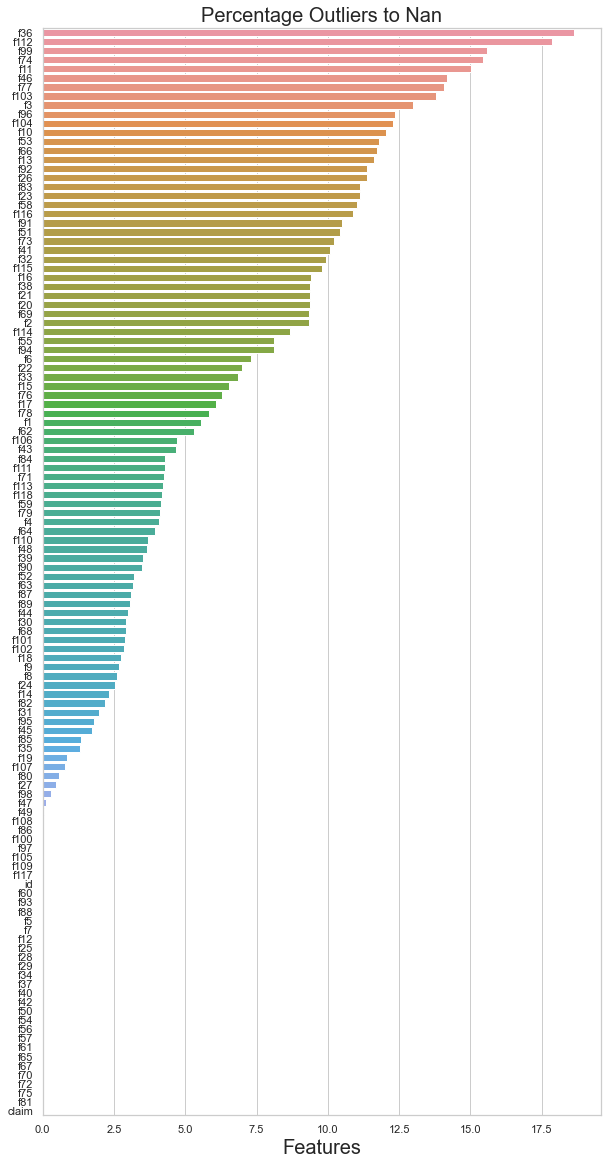

In [19]:
# % outliers_to_nan

plt.figure(figsize=(10, 20)) # Set the figure size
sn.set_theme(style="whitegrid")
outliers_to_nan_graph = sn.barplot(y = outliers_to_nan_df.index, x = 'Outliers to Nan%', data = outliers_to_nan_df, orient="h")
outliers_to_nan_graph.set_title("Percentage Outliers to Nan", fontsize = 20)
outliers_to_nan_graph.set_xlabel("Features", fontsize = 20)

In [20]:
# Controllo che i valori nulli siano stati effettivamente sostituiti con la media

data_outliers_converted = data_fillna.fillna(data_fillna.mean())
data_outliers_converted.isna().sum()

id       0
f1       0
f2       0
f3       0
f4       0
        ..
f115     0
f116     0
f117     0
f118     0
claim    0
Length: 120, dtype: int64

In [21]:
data_outliers_converted.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.381608,-37.56600,0.017364,0.28915,-0.101007,135.12,168900.0,3.992400e+14,86.489000,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,290.447664,8.6331,4.0607,26.86700,-1.180000,10961.00,1.5397,135.320000,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.000000,-0.000276,1.090600e+16,30.044769,414.290000,1.619008,1888.0,0.968930,18.3880,-0.001583,7.705900,5.932500,0.025693,4.5604,0.61122,10.7950,0.341930,0.235010,56.638828,5237.70,1.296100,163.66,0.403780,0.188600,-0.001446,-0.354160,6.6432,0.30534,0.514020,1.907300e+09,29.861,0.184944,1797.2,72.178,108.620000,1.9799,1.290700,0.99519,1.322800,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,5581.713492,1978.200000,5.508400,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000000,5.022400e+10,53.3980,-2.2012,6871.0,3.886200,0.409637,5252.100,166.690,1.607400,0.66534,7768.900000,0.99662,1.125700e+11,2.243200,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.748200,1.90960,-7.11570,4378.80,1.209600,8.613400e+14,140.100000,1.01770,1
1,1,0.10090,0.299610,1911.88761,0.276500,0.45970,-0.837330,1721.90,119810.0,3.874100e+15,9953.600000,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284000,6.1872,1.0419,4.64040,31.877000,123620.00,1.3951,125.810000,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.000000,-0.001344,3.079400e+16,229.100000,844.820000,1.468000,4726.5,0.915380,-1.5321,0.982600,7.111200,2.079700,0.042321,4.2523,0.41871,5.4499,0.012737,0.386470,7.308200,283.21,-0.925520,140.80,0.247390,-0.001656,-0.000975,-0.226290,2.4246,0.77147,0.011613,1.803700e+09,64.604,0.262650,4455.0,78.339,745.510000,2.9069,1.182944,1.00510,1.497400,84.446,4.549238e+14,2.242300e+09,0.896300,4.6749,17713.000000,9003.100000,-4.354600,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600000,2.300600e+10,44.0510,205.6900,4295.3,13.388000,0.468430,754.610,83.233,1.189000,29.55000,7343.700000,0.99815,4.877700e+13,1.270800,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,1.983339,0.34808,4.14200,913.23,1.246400,7.575100e+15,1861.000000,0.28359,0
2,2,0.17803,0.381608,907.27000,0.272140,0.45948,0.173270,2298.00,360650.0,1.224500e+13,2281.040014,0.38164,1.230300e+09,0.25807,2.455600,0.019394,26.873000,7.5463,1.9967,1.95260,136.012163,-2948.70,2.0054,97.897522,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.000000,-0.002207,5.849100e+13,30.044769,406.072571,1.356100,3063.4,0.086232,16.1060,0.001481,6.828566,5.343000,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.337700,-1.073200,4097.00,13.458000,159.24,0.322300,0.560090,0.000455,-0.160830,3.5753,0.60970,0.028301,5.271300e+08,14.454,0.115490,14605.0,36.992,-9.639100,64.2670,1.212457,0.99278,1.487493,430.400,-4.453500e+13,2.348109e+11,0.099591,6.5516,1887.500000,8875.507215,4.393100,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845000,1.306200e+09,2.3731,391.3700,2965.3,6.733556,0.494590,43.524,138.520,1.107900,0.91948,47.915000,0.99997,1.510500e+12,1.408233,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.204200,0.26290,8.13120,45119.00,1.176400,3.218100e+14,3838.200000,0.40690,1
3,3,0.15236,0.381608,780.10000,0.025179,0.51947,-0.101007,112.51,259490.0,7.781400e+13,-36.837000,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840000,7.8490,1.0379,8.00300,12.349000,-195.28,2.5598,92.14200

In [22]:
data_outliers_converted.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,9.579190e+05,957919.000000,957919.00000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,9.579190e+05,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,9.579190e+05,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,957919.000000,9.579190e+05,957919.000000,957919.000000,957919.000000
mean,478959.000000,0.094570,0.381608,1911.887610,0.173849,0.304869,-0.101007,1620.843815,3.489047e+05,1.622831e+15,2281.040014,1.07799,1.844436e+09,0.275923,6.493975,0.011705,290.447664,6.738853,4.140684,22.056322,136.012163,37659.074868,2.279020,97.897522,0.399533,414.983986,1.522857e+12,1.235360e+12,2.256887e+06,0.329054,7.322815,0.424460,78909.389413,2.663580e+05,-0.000005,2.645416e+16,30.044769,406.072571,1.619008,1770.175784,0.359381,284.199699,0.359571,6.828566,27.042448,0.012693,4.317276,0.027226,6.155414,-0.426087,0.299912,31.503397,2428.359078,5.460012,137.373234,0.272952,0.411071,0.000012,-0.247862,2.878047,0.548762,0.273404,1.995375e+09,33.362069,0.184944,47835.926728,94.515725,608.154443,26.499285,1.182944,0.418355,1.487493,482.147786,4.549238e+14,2.348109e+11,0.376600,6.717949,5581.713492,8875.507215,0.731321,0.190562,3.240370,9.839798e+10,81.297959,5.090935e+06,614.535636,3.250206e+10,24.133995,207.260994,3466.477141,6.406372,0.409637,2307.562393,132.264261,0.964927,12.414293,1781.452211,0.999970,1.399778e+13,1.408233,0.425840,18.468851,2.933531e+05,235.317288,1742.250287,0.178027,0.141050,0.013821,1.671062e+09,0.398622,-17.837689,1.983339,4.517199,0.752916,40407.041535,1.185719,2.178484e+16,3959.204669,0.506843,0.498492
std,276527.540591,0.034907,0.093337,2154.459236,0.161500,0.144169,1.288401,1265.910897,2.951730e+05,2.035582e+15,3086.288713,0.80277,2.108107e+09,0.052000,5.687944,0.073426,400.927805,1.094854,3.241369,13.866331,181.273450,46868.001600,0.567114,21.204311,1.453473,312.263969,1.860398e+12,1.606120e+12,2.285479e+06,0.430356,4.899755,0.691760,97415.753356,3.000047e+05,0.001522,3.211541e+16,169.160172,312.183250,0.344051,1587.491942,0.438194,374.815139,0.404127,1.247704,23.816989,0.013364,0.444214,0.666031,1.709733,0.722233,0.144913,40.454984,2065.698780,8.236252,15.912145,0.079158,0.

In [23]:
# Definisco le variabili

X = data_outliers_converted.drop(['id', 'claim'], axis = 1)
y = data_outliers_converted['claim']

array([[<AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'f3'}>,
        <AxesSubplot:title={'center':'f4'}>,
        <AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>,
        <AxesSubplot:title={'center':'f7'}>,
        <AxesSubplot:title={'center':'f8'}>,
        <AxesSubplot:title={'center':'f9'}>,
        <AxesSubplot:title={'center':'f10'}>,
        <AxesSubplot:title={'center':'f11'}>],
       [<AxesSubplot:title={'center':'f12'}>,
        <AxesSubplot:title={'center':'f13'}>,
        <AxesSubplot:title={'center':'f14'}>,
        <AxesSubplot:title={'center':'f15'}>,
        <AxesSubplot:title={'center':'f16'}>,
        <AxesSubplot:title={'center':'f17'}>,
        <AxesSubplot:title={'center':'f18'}>,
        <AxesSubplot:title={'center':'f19'}>,
        <AxesSubplot:title={'center':'f20'}>,
        <AxesSubplot:title={'center':'f21'}>,
        <AxesSubplot:title={'center':'f22'

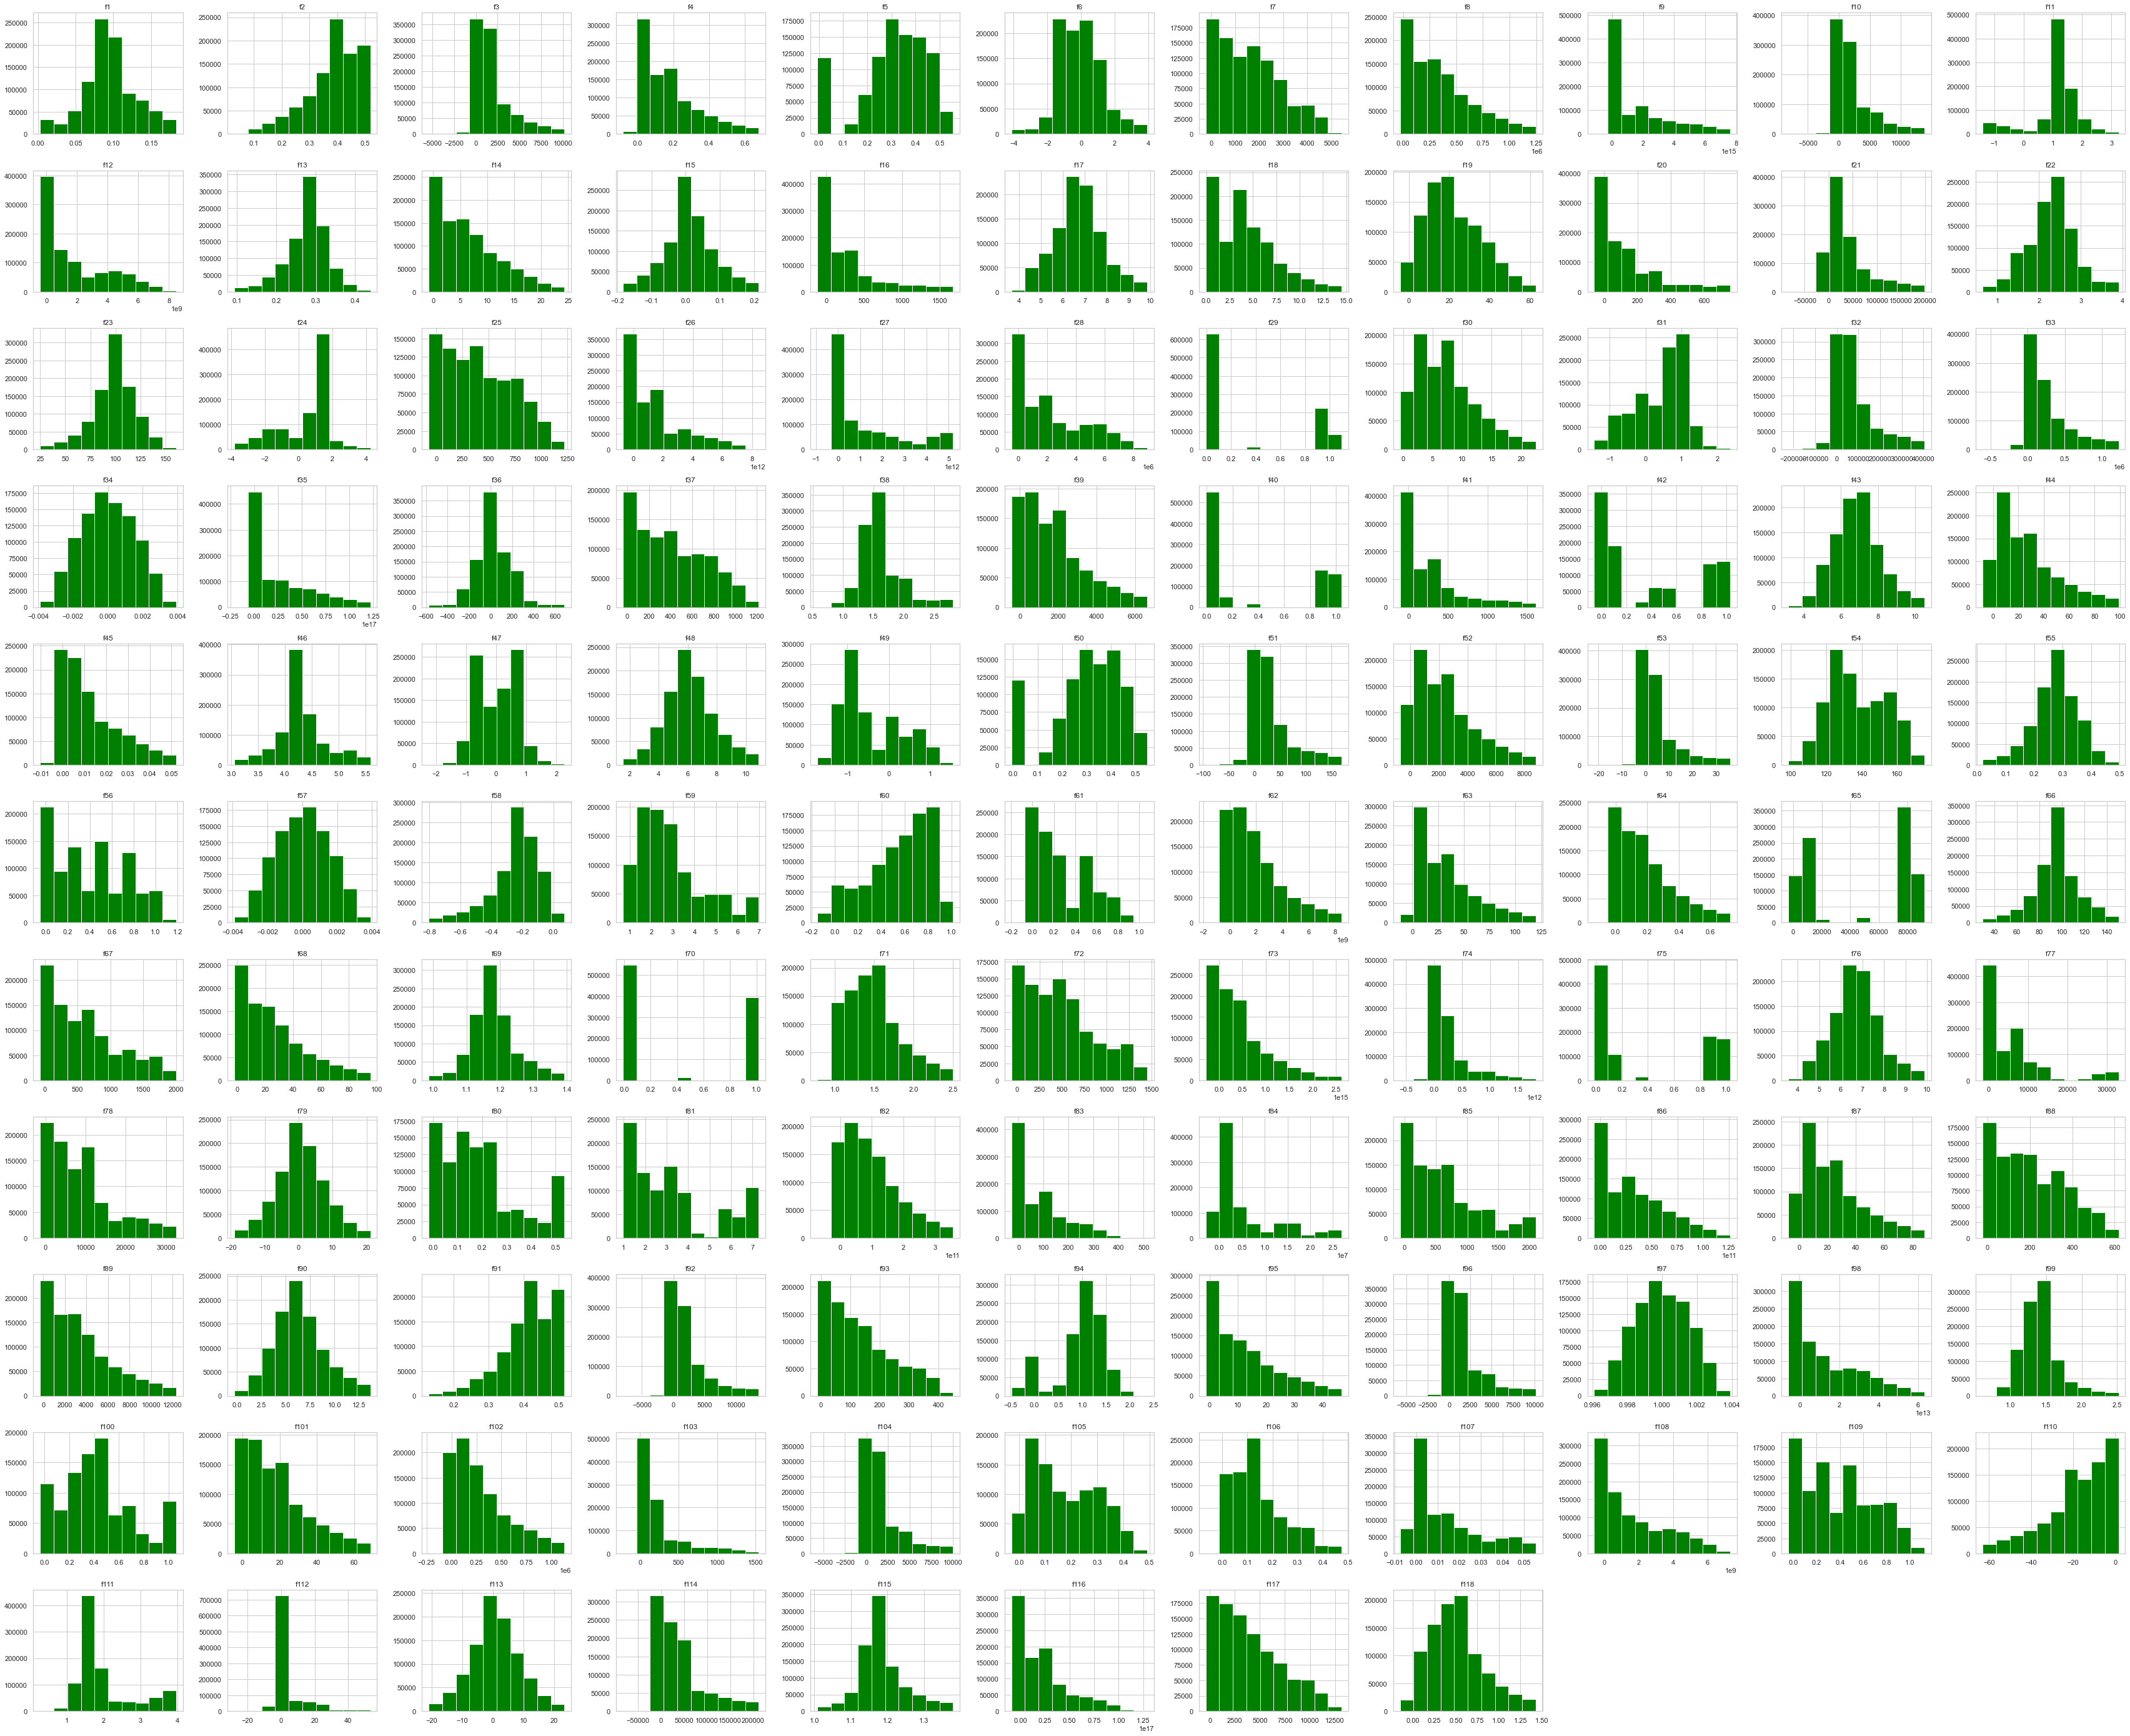

In [24]:
X.hist(figsize = (60, 50),
      color = 'green')

In [25]:
# Percentuali di frequenza dei valori 0 e 1

y.value_counts(normalize = True)*100

0    50.150796
1    49.849204
Name: claim, dtype: float64

I valori della colonna claim risultano bilanciati, non c'è bisogno di applicare Oversampling/Undersampling/SMOTE

In [26]:
class Giudice():
    
    def __init__(self):
        return None
        
    def data(self, X, y):
        self.X = X
        self.y = y
        return None
    
    def algo(self, algo):
        self.algo = algo
        return None
    
    def params(self, params):
        self.params = params
        return None
    
    def metrics(self, metrics):
        self.metrics = metrics
        return None
        
    def scores(self, metrics, algo, params):
        cv_Kfold = KFold(n_splits=10, random_state=1, shuffle=True)
        gscv = GridSearchCV(estimator = algo, param_grid = params, cv = cv_Kfold)
        scores = cross_validate(gscv, X = self.X, y = self.y, cv = cv_Kfold, scoring = metrics)
        score = np.mean(scores['test_score'])
        score = round(score, 2)
        return score
        
    def get_table(self, algo, metrics, params):
        metrics_results = {}
        for metrics in self.metrics:
            algo_results = {} 
            for label, algo in self.algo.items():
                grid = {}
                if label in self.params.keys():
                    grid = self.params[label]
                algo_results [label] = self.scores(metrics, algo, grid)
            metrics_results[metrics] = algo_results
            
            df = pd.DataFrame.from_dict(metrics_results)
        
        return df

Dopo aver definito una classe Giudice che si occuperà della creazione della tabella comparativa delle Pipeline, vado a definirne diverse, utilizzando come algoritmi il Decision tree, il Logistic Regression e il Random Forest.

## Pipeline

### Decision Tree

In [ ]:
grid = { 
    'rfe__n_features_to_select': [None, 5, 10],
    'rfe__step': [1, 3, 5],
    'dt__max_depth': [None, 3, 5, 10]
}

pipeline_dt = Pipeline([
    ('minmax', MinMaxScaler()),
    ('rfe', RFE(estimator = DecisionTreeClassifier())),
    ('dt', DecisionTreeClassifier())
])

gscv = GridSearchCV(estimator = pipeline_dt, param_grid = grid, scoring = 'roc_auc')
cv = cross_validate(gscv, X = X, y = y, scoring ='roc_auc', cv = 3) #cross validation - outer loop
score = np.mean(cv['test_score']) # calcolo dello score in termini di roc_auc
score # score medio

### Random Forest

In [ ]:
grid = {
    'rf__max_depth': [None, 2, 5],
    'rf__random_state': [None, 1, 2]
}

pipeline_rf = Pipeline([
    ('minmax', MinMaxScaler()),
    ('rf', RandomForestClassifier())
])

gscv = GridSearchCV(estimator = pipeline_rf, param_grid = grid, scoring = 'roc_auc')
cv = cross_validate(gscv, X = X, y = y, scoring ='roc_auc', cv = 3) #cross validation - outer loop
score = np.mean(cv['test_score']) # calcolo dello score in termini di roc_auc
score # score medio

### Logistic Regression

In [ ]:
pipeline_lr = Pipeline([
    ('minmax', MinMaxScaler()),
    ('lr', LogisticRegression())
])

gscv = GridSearchCV(estimator = pipeline_rf, param_grid = grid, scoring = 'accuracy')
cv = cross_validate(gscv, X = X, y = y, scoring ='accuracy', cv = 10) #cross validation - outer loop
score = np.mean(cv['test_score']) # calcolo dello score in termini di accuracy
score # score medio

## Model Evaluation and selection

In [ ]:
pipelines = {
    'pipe_dt': pipeline_dt,
    'pipe_rf': pipeline_rf,
    'pipe_lr': pipeline_lr
}

# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
metrics = [
    'roc_auc', 
    'accuracy',
    'precision'
]

params = {
    'dt': {
        'dt__max_depth': [None, 2, 3]
    },
    'rf': {
        'rf__n_estimators': [10, 50],
    },
    'lr':{
        'lr__max_iter': [10, 20, 50]
    }
}

giudice = Giudice()
giudice.data(X, y)
giudice.algo(pipelines)
giudice.params(params)
giudice.metrics(metrics)
giudice.get_table(pipelines, metrics, params)

## Model Evaluation and selection

In [ ]:
best_pipe = pipeline_lr
clf = GridSearchCV(best_pipe, param_grid = {})
clf.fit(X, y)
clf.best_estimator_

In [ ]:
clf.score(X, y)

A causa della grandezza del dataset e della scarsa potenza del mio pc, non sono riuscita a far girare il notebook con la dimensione originale. Nel notebook 'ridotto' è stato portata a termine l'analisi con un campione di n = 1000 osservazioni. Si riportano entrambi per illustrare in modo completo la parte iniziale di analisi dei dati fatta sul dataset originale.